# **KHANIF FAUZI PAMBUDI (MILESTONE 2 PHASE 1)**

Milestones   ini   dibuat   guna   mengevaluasi pembelajaran pada Hacktiv8 Data Science Full Time Program khususnya pada Phase 1. Link dataset dapat diakses melalui https://www.kaggle.com/benroshan/factors-affecting-campus-placement

# **IMPORT LIBRARY**

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 8.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=5f06ae42e0bac96c0caee850350a640043598d68f5c63c69c62f9251ece616d8
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import pandas as pd
import numpy as np
import os
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# **DATA LOADING**

In [3]:
df=pd.read_csv('Placement_Data_Full_Class.csv')
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.tail()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
210,211,M,80.6,Others,82.0,Others,Commerce,77.6,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.0,Others,60.0,Others,Science,72.0,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.0,Others,67.0,Others,Commerce,73.0,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.0,Others,66.0,Others,Commerce,58.0,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0
214,215,M,62.0,Central,58.0,Others,Science,53.0,Comm&Mgmt,No,89.0,Mkt&HR,60.22,Not Placed,NaN


# **DATA EXPLORATION**

In [6]:
len(df)

215

In [7]:
df.shape

(215, 15)

In [8]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sl_no,215.0,108.000000,62.209324,1.00,54.500,108.0,161.500,215.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.0,75.700,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.0,73.000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.0,72.000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.0,83.500,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.0,66.255,77.89
salary,148.0,288655.405405,93457.452420,200000.00,240000.000,265000.0,300000.000,940000.00


# **MISSING VALUE**

In [11]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [12]:
df['salary'].value_counts()

300000.0    22
250000.0    18
240000.0    15
260000.0     7
265000.0     6
200000.0     6
360000.0     6
220000.0     5
275000.0     5
270000.0     4
210000.0     4
400000.0     4
350000.0     3
216000.0     3
500000.0     3
280000.0     2
236000.0     2
218000.0     2
252000.0     2
204000.0     2
230000.0     2
276000.0     2
231000.0     1
380000.0     1
411000.0     1
650000.0     1
393000.0     1
225000.0     1
336000.0     1
264000.0     1
278000.0     1
287000.0     1
940000.0     1
340000.0     1
285000.0     1
425000.0     1
290000.0     1
690000.0     1
233000.0     1
255000.0     1
295000.0     1
450000.0     1
268000.0     1
420000.0     1
320000.0     1
Name: salary, dtype: int64

In [13]:
df['salary'].mean()

288655.4054054054

In [14]:
df['salary'].fillna('288655.0', inplace = True)

In [15]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# **EDA**

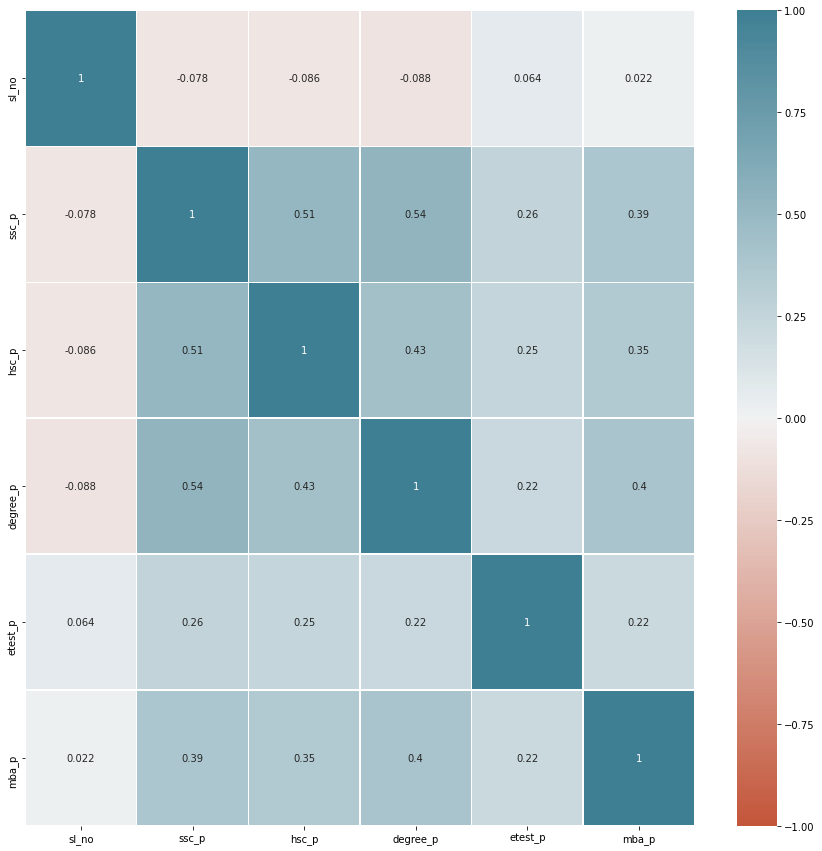

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

In [17]:
num_dat=df[df.describe().columns.values]
cat_dat=df.drop(columns=df.describe().columns.values)

In [18]:
num_dat.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p'], dtype='object')

In [19]:
cat_dat.columns

Index(['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status', 'salary'],
      dtype='object')

In [20]:
num_dat.head().T

,0,1,2,3,4
sl_no,1.0,2.00,3.0,4.00,5.0
ssc_p,67.0,79.33,65.0,56.00,85.8
hsc_p,91.0,78.33,68.0,52.00,73.6
degree_p,58.0,77.48,64.0,52.00,73.3
etest_p,55.0,86.50,75.0,66.00,96.8
mba_p,58.8,66.28,57.8,59.43,55.5


In [21]:
cat_dat.head().T

,0,1,2,3,4
gender,M,M,M,M,M
ssc_b,Others,Central,Central,Central,Central
hsc_b,Others,Others,Central,Central,Central
hsc_s,Commerce,Science,Arts,Science,Commerce
degree_t,Sci&Tech,Sci&Tech,Comm&Mgmt,Sci&Tech,Comm&Mgmt
workex,No,Yes,No,No,No
specialisation,Mkt&HR,Mkt&Fin,Mkt&Fin,Mkt&HR,Mkt&Fin
status,Placed,Placed,Placed,Not Placed,Placed
salary,270000,200000,250000,288655.0,425000


In [22]:
df['hsc_s'].value_counts()

Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64

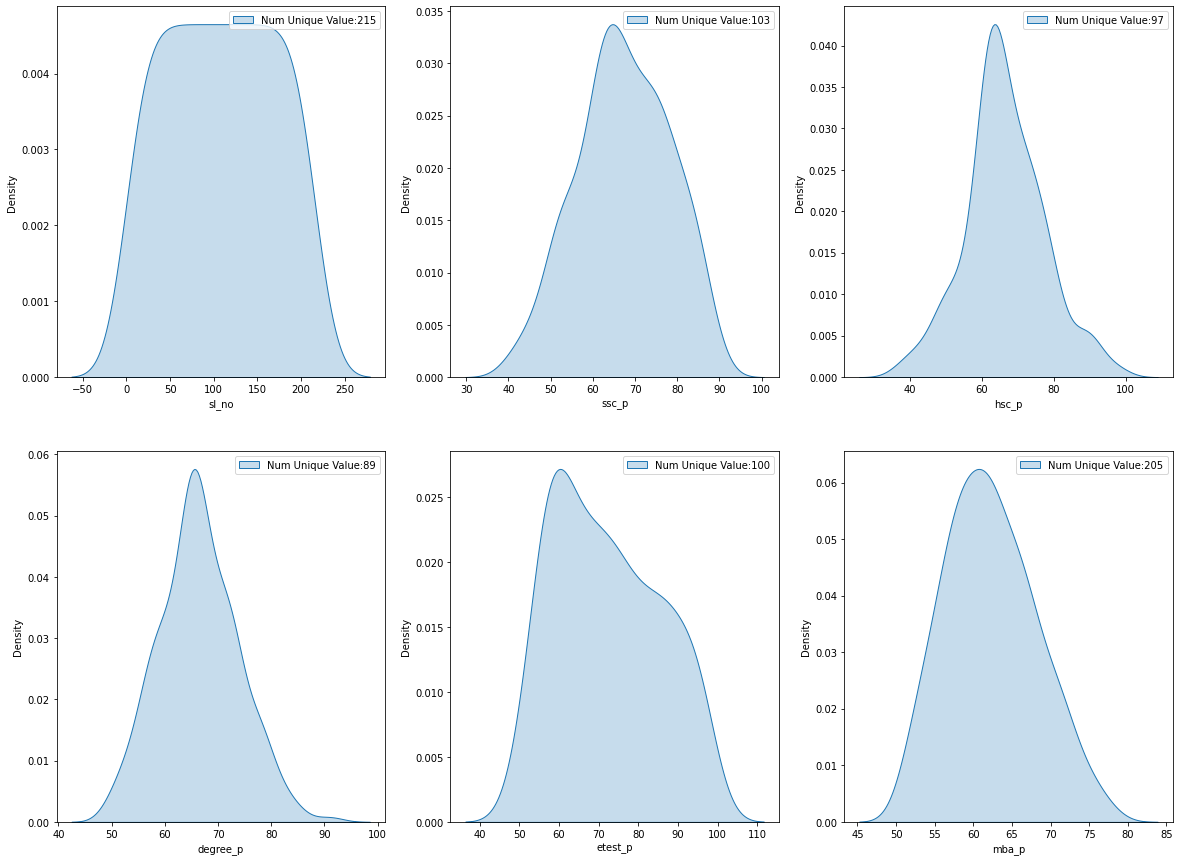

In [23]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
i=0
j=0
for col in num_dat.columns:
    sns.kdeplot(data=num_dat, x=col, fill=True,ax=axes[i][j],label='Num Unique Value:{}'.format(len(num_dat[col].unique())))
    axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

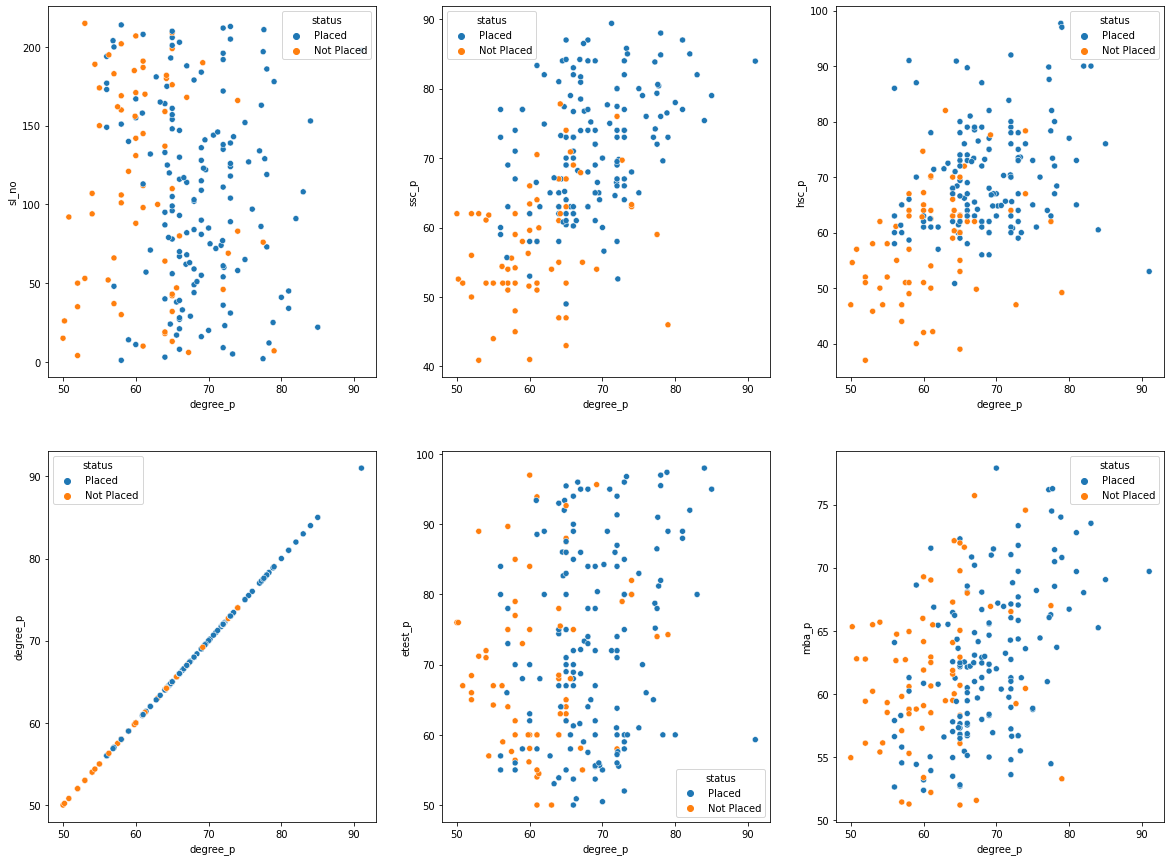

In [24]:
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,15))
i=0
j=0
for col in num_dat.columns:
    sns.scatterplot(data=df, x='degree_p',y=col, hue='status',ax=axes[i][j])
    #axes[i][j].legend()
    j+=1
    if j>2:
        i+=1
        j=0

# **EDA ANALYSIS**

*   Pada dataset yang kolomnya memiliki nilai numerical dilihat dari grafik persebaran datanya tersebar mengarah ke suatu target yang artinya data dengan tipe numerical pada dataset tersebut memiliki kecenderungan untuk memprediksi ke salah satu target sehingga memiliki relasi yang baik antara fitur data dengan target data. Dengan persebaran data seperti ini maka kolom yang bertipe numerikal digunakan untuk permodelan klasifikasi. 



*   Untuk dataset yang kolom nya memiliki nilai kategorikal untuk fitur workex akan di drop karena memiliki value yang sama seperti target real nya agar tidak terjadi bias karena memiliki 2 kategori sama seperti target yang memiliki 2 kategori juga




# **TARGET DATA**

In [25]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [26]:
df.groupby(["status"]).count()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
status,,,,,,,,,,,,,,
Not Placed,67,67,67,67,67,67,67,67,67,67,67,67,67,67
Placed,148,148,148,148,148,148,148,148,148,148,148,148,148,148


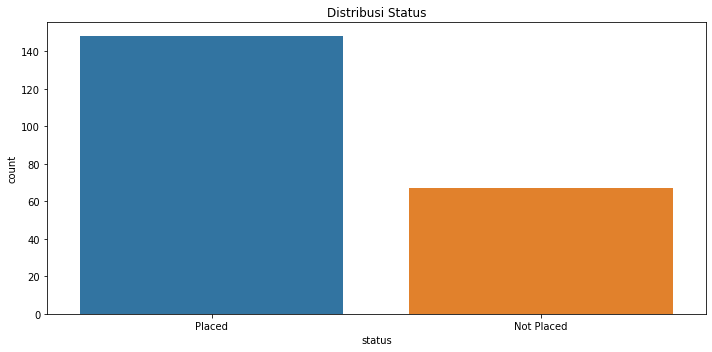

In [27]:
plt.figure(figsize = (10, 5))
sns.countplot(
    x = df["status"],
)
plt.title("Distribusi Status")
plt.tight_layout()
plt.show()

# **FEATURE ENGINEERING**

In [28]:
new_df = df.copy()

In [29]:
#melakukan encoding terhadap fitur kategori
encode = LabelEncoder()
new_df['gender'] = encode.fit_transform(new_df['gender'])
new_df['ssc_b'] = encode.fit_transform(new_df['ssc_b'])
new_df['hsc_b'] = encode.fit_transform(new_df['hsc_b'])
new_df['hsc_s'] = encode.fit_transform(new_df['hsc_s'])
new_df['degree_t'] = encode.fit_transform(new_df['degree_t'])
new_df['workex'] = encode.fit_transform(new_df['workex'])
new_df['specialisation'] = encode.fit_transform(new_df['specialisation'])
new_df['status'] = encode.fit_transform(new_df['status'])

In [30]:
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,288655.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000


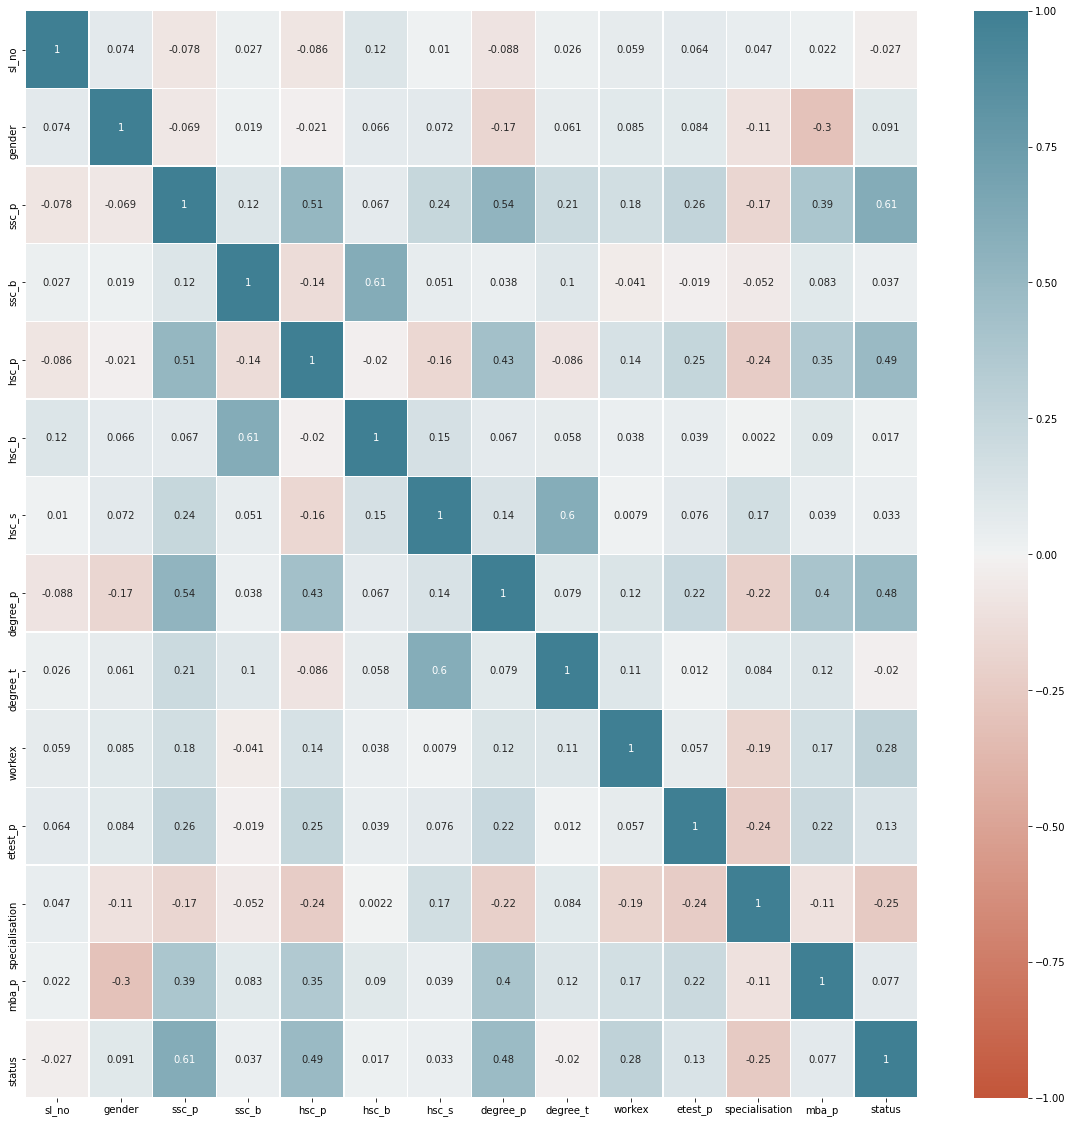

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True, linewidths=.5)

In [32]:
df1 = new_df.drop(columns=["workex"])

**One-Hot-Encoding (Dummy variables)**

In [33]:
print("Original features:\n", list(df1.columns), "\n")
data_dummies = pd.get_dummies(df1)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary'] 

Features after get_dummies:
 ['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'etest_p', 'specialisation', 'mba_p', 'status', 'salary_200000.0', 'salary_204000.0', 'salary_210000.0', 'salary_216000.0', 'salary_218000.0', 'salary_220000.0', 'salary_225000.0', 'salary_230000.0', 'salary_231000.0', 'salary_233000.0', 'salary_236000.0', 'salary_240000.0', 'salary_250000.0', 'salary_252000.0', 'salary_255000.0', 'salary_260000.0', 'salary_264000.0', 'salary_265000.0', 'salary_268000.0', 'salary_270000.0', 'salary_275000.0', 'salary_276000.0', 'salary_278000.0', 'salary_280000.0', 'salary_285000.0', 'salary_287000.0', 'salary_290000.0', 'salary_295000.0', 'salary_300000.0', 'salary_320000.0', 'salary_336000.0', 'salary_340000.0', 'salary_350000.0', 'salary_360000.0', 'salary_380000.0', 

In [34]:
display(data_dummies.head())

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,status,salary_200000.0,salary_204000.0,salary_210000.0,salary_216000.0,salary_218000.0,salary_220000.0,salary_225000.0,salary_230000.0,salary_231000.0,salary_233000.0,salary_236000.0,salary_240000.0,salary_250000.0,salary_252000.0,salary_255000.0,salary_260000.0,salary_264000.0,salary_265000.0,salary_268000.0,salary_270000.0,salary_275000.0,salary_276000.0,salary_278000.0,salary_280000.0,salary_285000.0,salary_287000.0,salary_290000.0,salary_295000.0,salary_300000.0,salary_320000.0,salary_336000.0,salary_340000.0,salary_350000.0,salary_360000.0,salary_380000.0,salary_393000.0,salary_400000.0,salary_411000.0,salary_420000.0,salary_425000.0,salary_450000.0,salary_500000.0,salary_650000.0,salary_690000.0,salary_940000.0,salary_288655.0
0,1,1,67.00,1,91.00,1,1,58.00,2,55.0,1,58.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,79.33,0,78.33,1,2,77.48,2,86.5,0,66.28,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,65.00,0,68.00,0,0,64.00,0,75.0,0,57.80,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,56.00,0,52.00,0,2,52.00,2,66.0,1,59.43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,1,85.80,0,73.60,0,1,73.30,0,96.8,0,55.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [35]:
features = data_dummies.loc[:, 'sl_no':'status']
# Extract NumPy arrays
X = features.values
y = data_dummies['salary_210000.0'].values
print("X.shape: {}  y.shape: {}".format(X.shape, y.shape))

X.shape: (215, 13)  y.shape: (215,)


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print("Test score: {:.2f}".format(model.score(X_test, y_test)))

Test score: 0.96


**Numbers Encode Categoricals**

In [37]:
# create a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2],
                        'Categorical Feature': ['Commerce', 'Science', 'Arts ']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,Commerce
1,1,Science
2,2,Arts


In [38]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_Arts,Categorical Feature_Commerce,Categorical Feature_Science
0,0,0,1,0
1,1,0,0,1
2,2,1,0,0


In [39]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
display(pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature']))

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_Arts,Categorical Feature_Commerce,Categorical Feature_Science
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,1,0,0


**OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn**

In [40]:
from sklearn.preprocessing import OneHotEncoder
# Setting sparse=False means OneHotEncode will return a numpy array, not a sparse matrix
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0.]]


In [41]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_Arts ' 'x1_Commerce' 'x1_Science']


In [42]:
display(df1.head())

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,55.0,1,58.80,1,270000
1,2,1,79.33,0,78.33,1,2,77.48,2,86.5,0,66.28,1,200000
2,3,1,65.00,0,68.00,0,0,64.00,0,75.0,0,57.80,1,250000
3,4,1,56.00,0,52.00,0,2,52.00,2,66.0,1,59.43,0,288655.0
4,5,1,85.80,0,73.60,0,1,73.30,0,96.8,0,55.50,1,425000


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p','salary']),
     ("onehot", OneHotEncoder(sparse=False), ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t',
                                              'specialisation', 'status'])])

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# get all columns apart from status for the features
data_features = df1.drop('status', axis=1)
data_features = df1
# split dataframe and status
X_train, X_test, y_train, y_test = train_test_split(
    data_features, df.status, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(161, 23)


In [45]:
model =  RandomForestClassifier(n_estimators= 500)
model.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(model.score(X_test_trans, y_test)))

Test score: 1.00


In [46]:
ct.named_transformers_.onehot

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

# **PIPELINES**

In [47]:
X = df1.drop(columns = ["status"])
y = df1["status"]

In [48]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.2, random_state = 54)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size = 1/5, random_state = 54)
scaler = MinMaxScaler().fit(X_train)

In [49]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)

rf = RandomForestClassifier()
# learn an RF on the scaled training data
rf.fit(X_train_scaled, y_train)
# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(rf.score(X_test_scaled, y_test)))

Test score: 0.89


In [50]:
new_scaler = MinMaxScaler().fit(X)
new_df1 = pd.DataFrame(new_scaler.transform(X))
new_df1['status'] = y
new_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,status
0,0.000000,1.0,0.538240,1.0,0.889621,1.0,0.5,0.195122,1.0,0.104167,1.0,0.284483,0.094595,1
1,0.004673,1.0,0.792414,0.0,0.680890,1.0,1.0,0.670244,1.0,0.760417,0.0,0.564843,0.000000,1
2,0.009346,1.0,0.497011,0.0,0.510708,0.0,0.0,0.341463,0.0,0.520833,0.0,0.247001,0.067568,1
3,0.014019,1.0,0.311482,0.0,0.247117,0.0,1.0,0.048780,1.0,0.333333,1.0,0.308096,0.119804,0
4,0.018692,1.0,0.925788,0.0,0.602965,0.0,0.5,0.568293,0.0,0.975000,0.0,0.160795,0.304054,1


**Membuat Pipeline untuk Model Random Forest**

In [51]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("rf", RandomForestClassifier())])

In [52]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [53]:
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.89


**Pipeline dengan GridsearchCV**

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
pipegrid = make_pipeline(StandardScaler(), RandomForestClassifier(min_samples_split= [10, 50, 100, 300, 500],
                                                                  n_estimators= [10, 50, 100, 300, 500]))

In [55]:
print("Pipeline steps:\n{}".format(pipegrid.steps))

Pipeline steps:
[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1,
                       min_samples_split=[10, 50, 100, 300, 500],
                       min_weight_fraction_leaf=0.0,
                       n_estimators=[10, 50, 100, 300, 500], n_jobs=None,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False))]


In [56]:
param_grid = {'rf__min_samples_split': [10, 50, 100, 300, 500],
              'rf__n_estimators': [10, 50, 100, 300, 500]}

In [57]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.94
Test set score: 0.89
Best parameters: {'rf__min_samples_split': 10, 'rf__n_estimators': 500}


# **MODEL RANDOM FOREST**

In [58]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

In [59]:
X_train.shape, X_test.shape

((172, 13), (43, 13))

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 55   0]
 [  0 117]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
              0      1  accuracy  macro avg  weighted avg
precision   1.0    1.0       1.0        1.0           1.0
recall      1.0    1.0       1.0        1.0           1.0
f1-score    1.0    1.0       1.0        1.0           1.0
support    55.0  117.0       1.0      172.0         172.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[11  1]
 [ 1 30]]
ACCURACY SCORE:
0.9535
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.916667   0.967742  0.953488   0.942204      0.953488
recall      0.916667   0.967742  0.953488   0.942204      0.953488
f1-score    0.916667   0.967742  0.953488   0.942204      0.953488
support    12.000000  31.000000  0.953488  43.000000     43.000000


# **MODEL EVALUATION**

In [62]:
X.shape

(215, 13)

In [63]:
y.value_counts()

1    148
0     67
Name: status, dtype: int64

In [64]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[11  1]
 [ 2 29]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.97      0.94      0.95        31

    accuracy                           0.93        43
   macro avg       0.91      0.93      0.92        43
weighted avg       0.93      0.93      0.93        43

0.9302325581395349


**Manual Search**

In [67]:
model_1 = RandomForestClassifier(n_estimators=300,
                                 criterion='entropy',
                                 max_features='sqrt',
                                 min_samples_leaf=10)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[11  0]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.94      0.97        32

    accuracy                           0.95        43
   macro avg       0.92      0.97      0.94        43
weighted avg       0.96      0.95      0.95        43

0.9534883720930233


# **MODEL IMPROVEMENT**

**Random Search**

In [68]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['entropy','gini']}

In [69]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                 cv=5, random_state=46, n_jobs=-1)
rf_randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [70]:
rf_randomcv.best_params_

{'criterion': 'entropy',
 'max_depth': 450,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 2000}

In [71]:
rf_best_random = rf_randomcv.best_estimator_

In [72]:
y_pred = rf_best_random.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[12  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

0.9767441860465116


**Grid Search**

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid) 

{'criterion': ['entropy'], 'max_depth': [450], 'max_features': ['auto'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [3, 4, 5, 6, 7], 'n_estimators': [1800, 1900, 2000, 2100, 2200]}


In [74]:
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 26.1min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 30.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [75]:
best_grid=grid_search.best_estimator_

In [76]:
best_grid

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=450, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [77]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[12  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

0.9767441860465116


# **ADDITIONAL MODEL EVALUATION**

**Parameter Tuning Based on Bayesian Optimization**

In [78]:
!pip install hyperopt

In [79]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [80]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200,1300,1500])
    }

In [81]:
space

{'criterion': <hyperopt.pyll.base.Apply at 0x7fa3cf389550>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7fa3cf389790>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7fa3cf3898d0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7fa3cf389b90>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7fa3cf389d10>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7fa3cf389e90>}

In [82]:
from sklearn.model_selection import cross_val_score
def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_train, y_train, cv = 5).mean()

    # tujuan ingin memaksimalkan akurasi, sehingga meminimumkan negatif akurasi
    return {'loss': -1*accuracy, 'status': STATUS_OK }

In [83]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=80,
            trials=trials)
best

100%|██████████| 80/80 [09:07<00:00,  6.85s/it, best loss: -0.9826890756302522]


{'criterion': 0,
 'max_depth': 390.0,
 'max_features': 3,
 'min_samples_leaf': 0.00924941837208415,
 'min_samples_split': 0.038799439451103784,
 'n_estimators': 6}

In [84]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 300, 3: 750, 4: 1200,5:1300,6:1500}


print(crit[best['criterion']])
print(feat[best['max_features']])
print(est[best['n_estimators']])

entropy
None
1500


In [85]:
trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]).fit(X_train,y_train)
y_pred = trainedforest.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[13  0]
 [ 0 30]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        30

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43

1.0


# **MODEL INFERENCE**

**Manual Search**

In [86]:
y_pred = model_1.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test))

[[11  0]
 [ 2 30]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.94      0.97        32

    accuracy                           0.95        43
   macro avg       0.92      0.97      0.94        43
weighted avg       0.96      0.95      0.95        43

0.9534883720930233


**Random Search**

In [87]:
y_pred = rf_best_random.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[12  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

0.9767441860465116


**Grid Search**

In [88]:
y_pred = best_grid.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred, y_test))

[[12  0]
 [ 1 30]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.97      0.98        31

    accuracy                           0.98        43
   macro avg       0.96      0.98      0.97        43
weighted avg       0.98      0.98      0.98        43

0.9767441860465116


# **MODEL ANALYSIS**

Pada percobaan model menggunakan dataset Campus Recruitment dapat disimpulkan hasil analisa sebagai berikut


*   Model yang digunakan adalah model random forest
*   Pada proses pengolahan data train dan test dilakukan pengolahan dengan model evaluation dan model improvement

*   Saat melakukan model evaluation hasilnya akurasinya 0.9534 hal ini dapat disebabkan karena dari semua fitur nilainya hampir memiliki kecenderungan pada target tertentu sehingga menghasilkan nilai akurasi yang tinggi 
*   Kemudian dilakukan model improvement untuk mencari hasil klasifikasi yang baik antara dua kelas. Untuk metode nya menggunakan random search dan grid search

*   pada model improvement akan dicari parameter terbaik untuk menghasilkan nilai akurasi yang lebih baik



*   Pada metode random search menghasilkan hasil yang lebih baik yaitu 0.9767 dan menghasilkan kenaikan angka akurasi pada precision, recall, dan f-1 score untuk kelas yang persebarannya sedikit
*   Hal tersebut juga terjadi pada metode grid search yang menghasilkan hasil yang sama yaitu 0.9767 namun proses running time pada metode grid search lebih lama dibandingkan dengan random search



*   Pada proses model improvement metode random search menghasilkan hasil yang lebih baik dan running time yang cepat dibanding metode model improvement yang lain

# **OVERALL ANALYSIS**

Pada percobaan model menggunakan dataset Campus Recruitment dapat disimpulkan hasil analisa sebagai berikut


*   Proses Feature Engineering dapat menghasilkan sebuat feature baru yang dapat memetakan persebaran feature data ke target data agar dapat menghasilkan tingkat akurasi yang lebih baik
*   Pipeline dapat digunakan untuk menghasilkan data test dan data prediksi yang lebih baik karena pembagian split data dapat diatur sesuai dengan panjang pipeline yang di set

*   Pada  percobaan kali ini model yang digunakan adalah model random forest karena model ini dikenal lebih baik dari model-model lain untuk menanggulangi persebaran data yang tidak merata
*   Pada model evaluasi dilakukan juga model improvement untuk menghasilkan nilai model yang baik. 

*   Untuk model evaluasi menggunakan manual search yang parameter prediksinya sudah ditentukan diawal
*   Untuk model improvement menggunakan random search dan grid search



*   Pada proses model improvement metode random search menghasilkan hasil yang lebih baik diantara metode yang lain